# Day 08. Exercise 05
# Clustering

## 0. Imports

In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [23]:
df = pd.read_csv('../data/regression.csv')

In [24]:
df = df.drop(['pageviews'], axis=1)
df.head()

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [25]:
X = df.drop(['uid'], axis=1)
y = df['AVG(diff)']

In [26]:
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(X)
labels = kmeans.predict(X)
clusters = kmeans.cluster_centers_

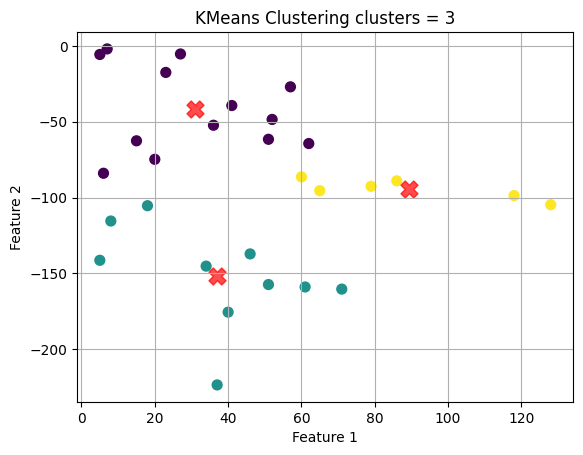

In [27]:
def plot_graph(X, labels, clusters = None):
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', s=50)
    if clusters is not None:
        plt.scatter(clusters[:, 0], clusters[:, 1], c='red', s=150, alpha=0.7, marker='X')
    clust_num = len(np.unique(np.array([x for x in labels if x != -1])))
    plt.title(f'KMeans Clustering clusters = {clust_num}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid()
plot_graph(X, labels, clusters)

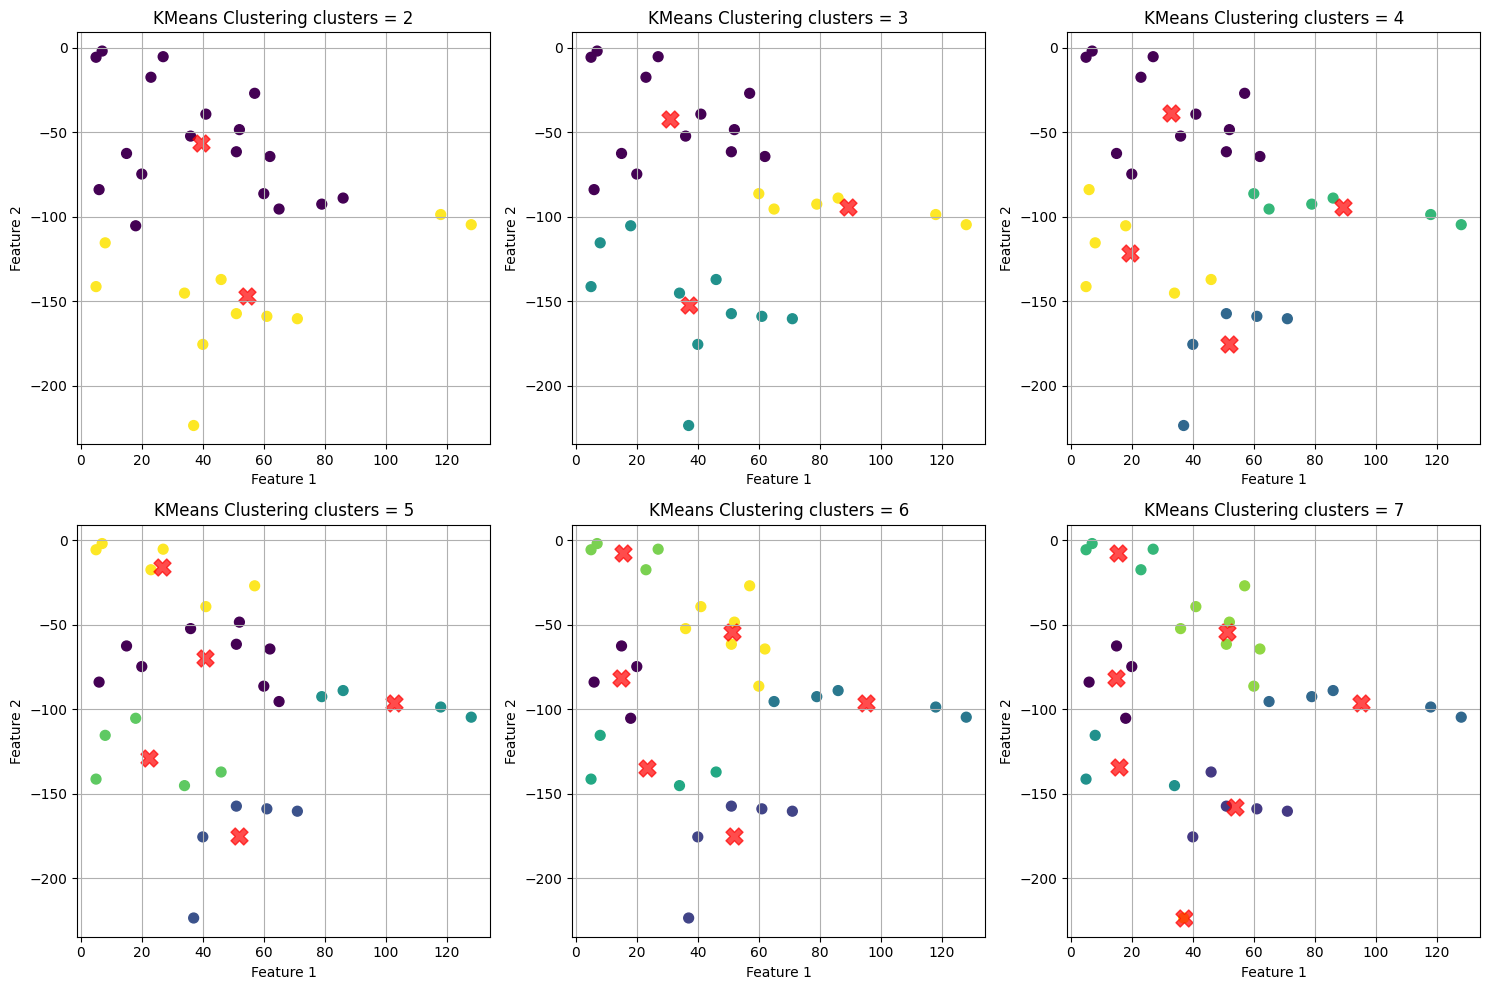

In [28]:
plt.figure(figsize=(15, 10))
i = 0
for clusters in range(2, 8):
    kmeans = KMeans(n_clusters=clusters, random_state=21)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    clusters = kmeans.cluster_centers_
    plt.subplot(2, 3, i + 1)
    plot_graph(X, labels, clusters)
    i += 1
plt.tight_layout()

In [29]:
for clusters in range(2, 8):
    kmeans = KMeans(n_clusters=clusters, random_state=21)
    lable = kmeans.fit_predict(X)
    score = silhouette_score(X, lable)
    print(f'Silhouette Score for n_clusters={clusters}: {score}')

Silhouette Score for n_clusters=2: 0.4194920562377423
Silhouette Score for n_clusters=3: 0.4454402135233297
Silhouette Score for n_clusters=4: 0.41503879936268956
Silhouette Score for n_clusters=5: 0.3521030626149593
Silhouette Score for n_clusters=6: 0.3954350435152892
Silhouette Score for n_clusters=7: 0.39637476619843964


## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [30]:
dbscan = DBSCAN(eps=20, min_samples=2)
dbscan.fit_predict(X)
labels = dbscan.labels_

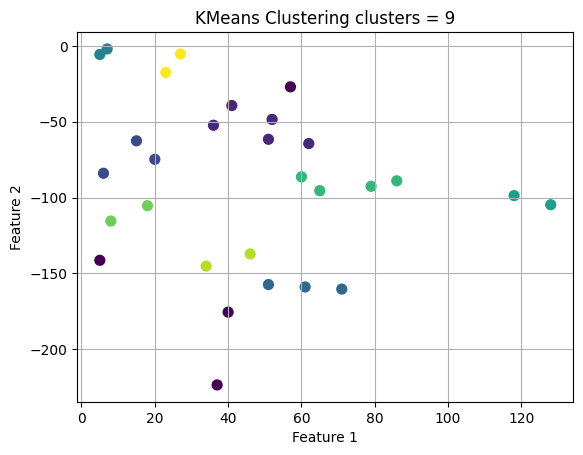

In [31]:
plot_graph(X, labels)

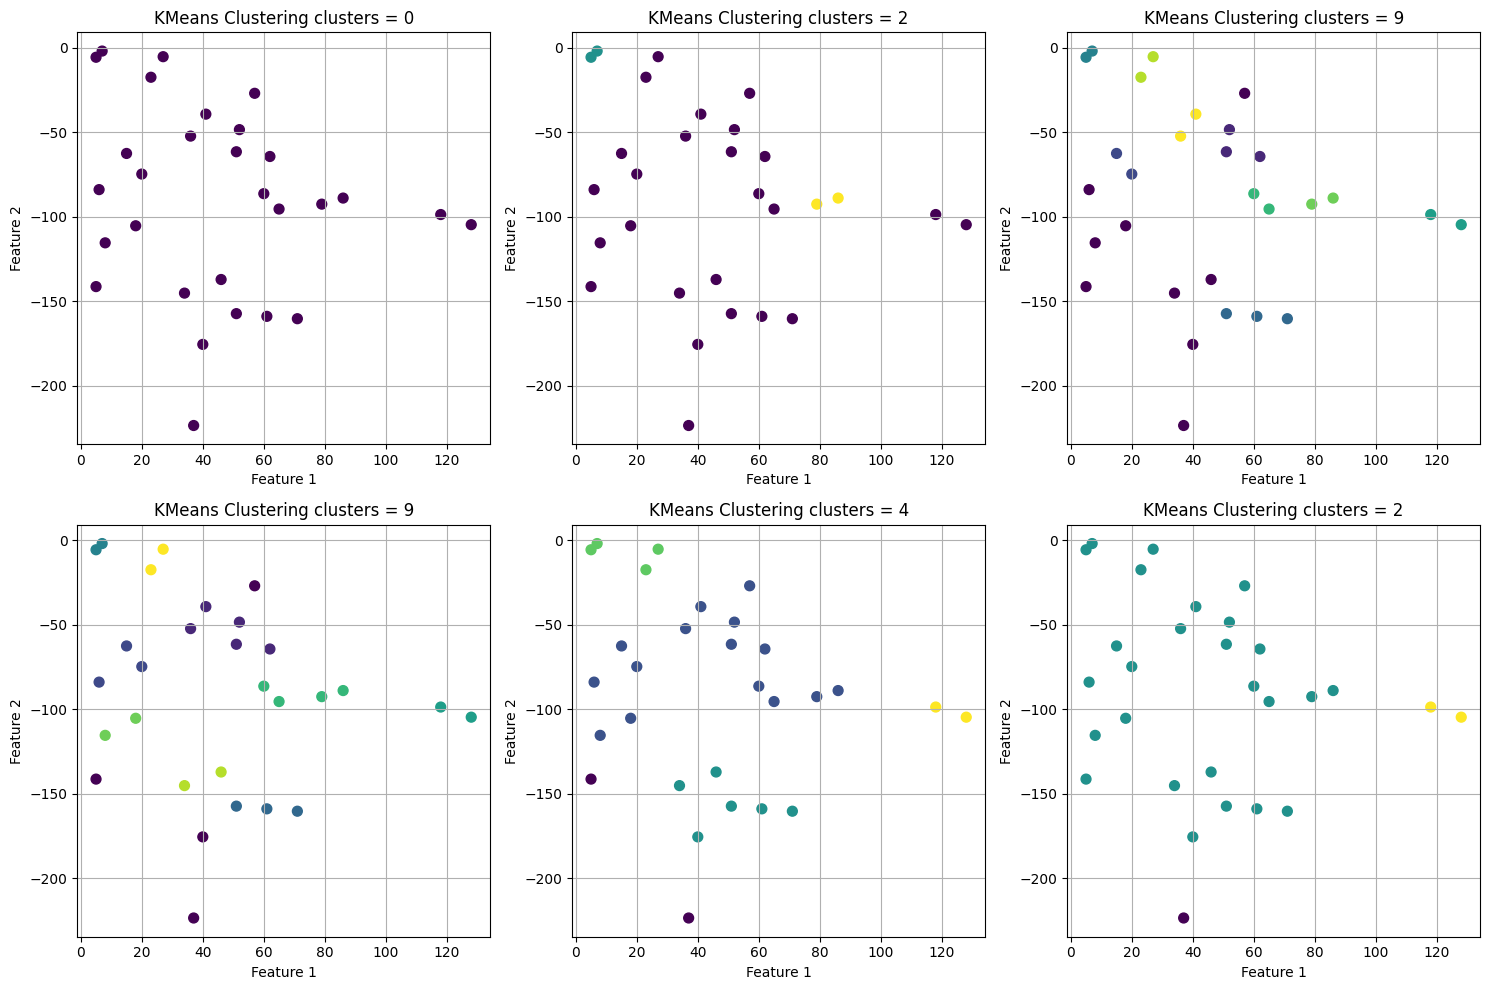

In [32]:
plt.figure(figsize=(15, 10))
i = 0
for eps in range(2, 38, 6):
    dbscan = DBSCAN(eps=eps, min_samples=2)
    dbscan.fit(X)
    labels = dbscan.labels_
    plt.subplot(2, 3, i + 1)
    plot_graph(X, labels)
    i += 1
plt.tight_layout()

In [33]:
# Параметры для тестирования
params = [
    {'eps': 10, 'min_samples': 2},
    {'eps': 10, 'min_samples': 3},
    {'eps': 20, 'min_samples': 3},
    {'eps': 20, 'min_samples': 4},
    {'eps': 30, 'min_samples': 3},
    {'eps': 30, 'min_samples': 5},
    {'eps': 40, 'min_samples': 3},
]

# Расчет silhouette_score для каждого набора параметров
for param in params:
    dbscan = DBSCAN(eps=param['eps'], min_samples=param['min_samples'])
    dbscan.fit(X)
    labels = dbscan.labels_
    
    # Если есть только один кластер или все точки — шум, silhouette_score не может быть вычислен
    if len(set(labels)) > 1:
        score = silhouette_score(X, labels)
        print(f"Silhouette Score (eps={param['eps']}, min_samples={param['min_samples']}): {score:.2f}")
    else:
        print(f"Cannot compute Silhouette Score (eps={param['eps']}, min_samples={param['min_samples']}): only one cluster or all noise.")

Silhouette Score (eps=10, min_samples=2): -0.08
Cannot compute Silhouette Score (eps=10, min_samples=3): only one cluster or all noise.
Silhouette Score (eps=20, min_samples=3): 0.05
Silhouette Score (eps=20, min_samples=4): -0.03
Silhouette Score (eps=30, min_samples=3): 0.29
Silhouette Score (eps=30, min_samples=5): 0.32
Silhouette Score (eps=40, min_samples=3): 0.37


## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [34]:
agglo = AgglomerativeClustering(n_clusters=5)
labele = agglo.fit_predict(X)
labels = agglo.labels_

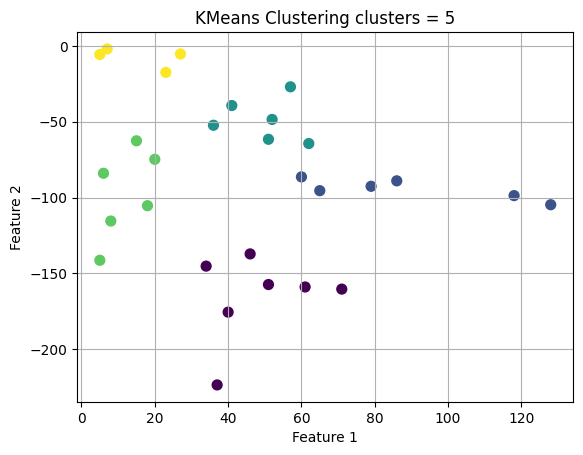

In [35]:
plot_graph(X, labels)

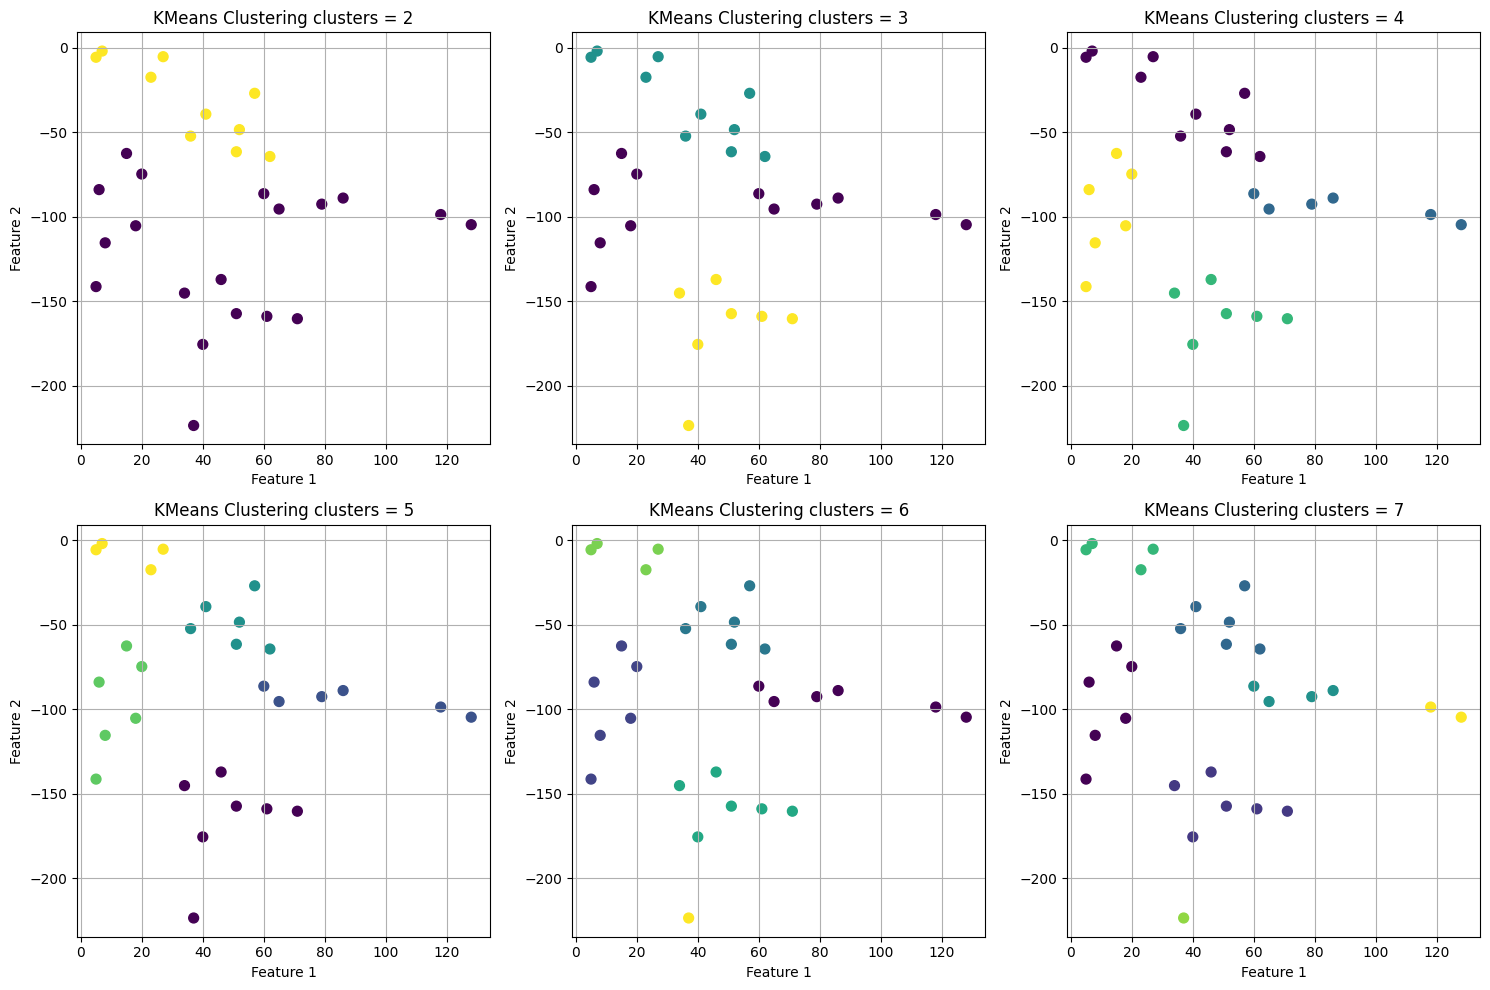

In [36]:
plt.figure(figsize=(15, 10))
i = 0
for clusters in range(2, 8):
    agglo = AgglomerativeClustering(n_clusters=clusters,)
    agglo.fit_predict(X)
    labels = agglo.labels_
    plt.subplot(2, 3, i + 1)
    plot_graph(X, labels)
    i += 1
plt.tight_layout()

In [37]:
for clusters in range(2, 8):
    agglo = AgglomerativeClustering(n_clusters=clusters)
    lable = agglo.fit_predict(X)
    score = silhouette_score(X, lable)
    print(f'Silhouette Score for n_clusters={clusters}: {score:.2f}')

Silhouette Score for n_clusters=2: 0.36
Silhouette Score for n_clusters=3: 0.34
Silhouette Score for n_clusters=4: 0.44
Silhouette Score for n_clusters=5: 0.46
Silhouette Score for n_clusters=6: 0.45
Silhouette Score for n_clusters=7: 0.49


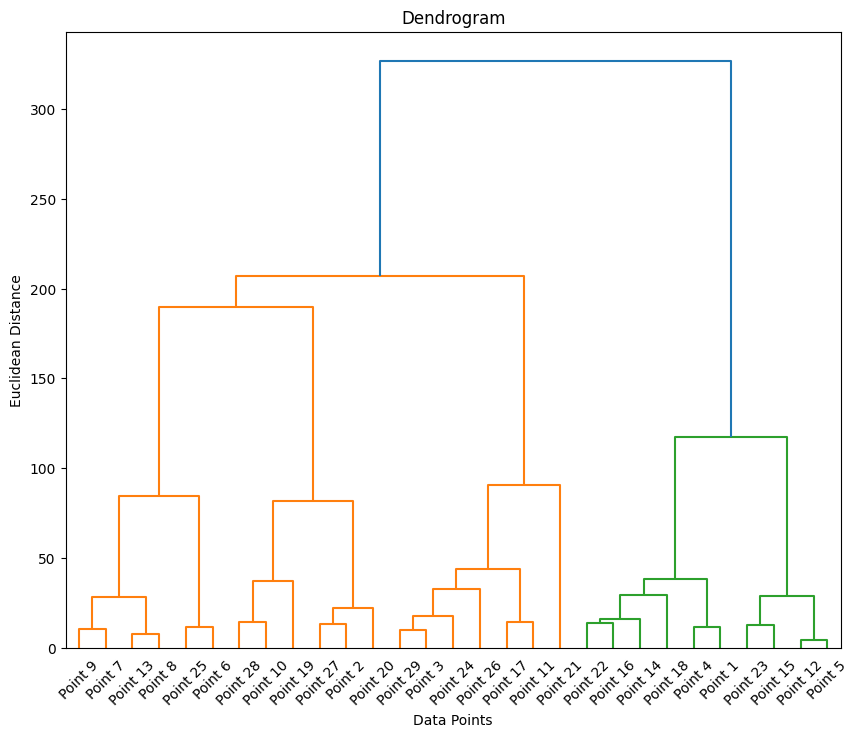

In [38]:
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 8))
dendrogram(
    linked,
    orientation='top',
    labels=[f'Point {i + 1}' for i in range(len(X))],
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [39]:
def best_param_in_range(class_model, param, name_param, range_param, X):
    best_score = -1
    best_value = None
    best_labels = None
    score_list = []

    for value in range_param:
        param[name_param] = value
        model = class_model(**param)
        labels = model.fit_predict(X)

        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            score_list.append(score)
            
            if score > best_score:
                best_score = score
                best_value = value
                best_labels = labels
        else:
            score_list.append(np.nan)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range_param, score_list, marker='o', color='blue')
    plt.title(f'Silhouette Score vs {name_param}')
    plt.xlabel(name_param)
    plt.ylabel('Silhouette Score')
    plt.grid(True)

    plt.axhline(y=best_score, linestyle='--', color='red')

    plt.subplot(1, 2, 2)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=best_labels, cmap='viridis', s=100)
    plt.title(f'Clustering with {name_param}={best_value}\nSilhouette Score: {best_score:.2f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.grid(True)

    plt.tight_layout()
    plt.show()
    return best_value

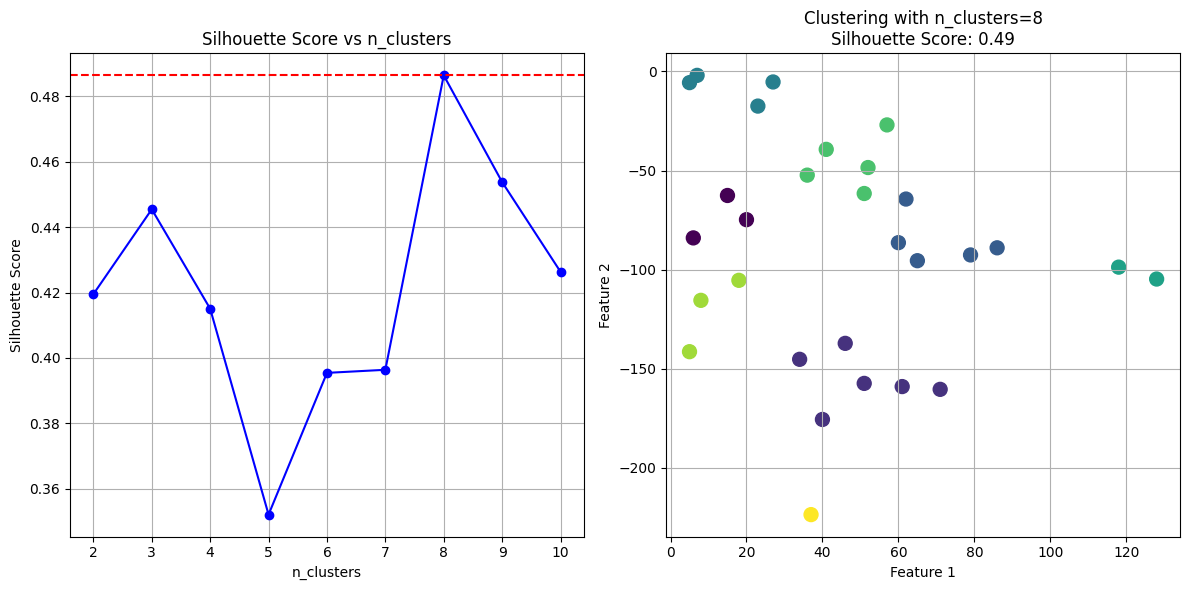

In [40]:
best_n_clusters = best_param_in_range(
    class_model=KMeans,
    param={'random_state': 21},
    name_param='n_clusters',
    range_param=range(2, 11),
    X=X
)

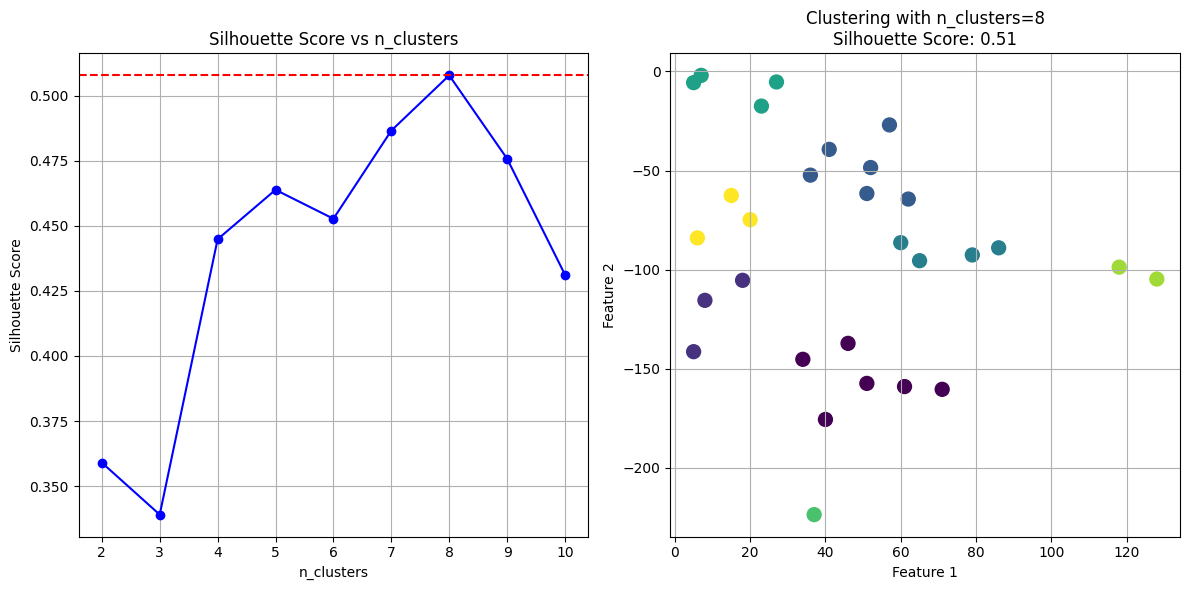

In [41]:
best_n_clusters = best_param_in_range(
    class_model=AgglomerativeClustering,
    param={'n_clusters': 2},
    name_param='n_clusters',
    range_param=range(2, 11),
    X=X
)

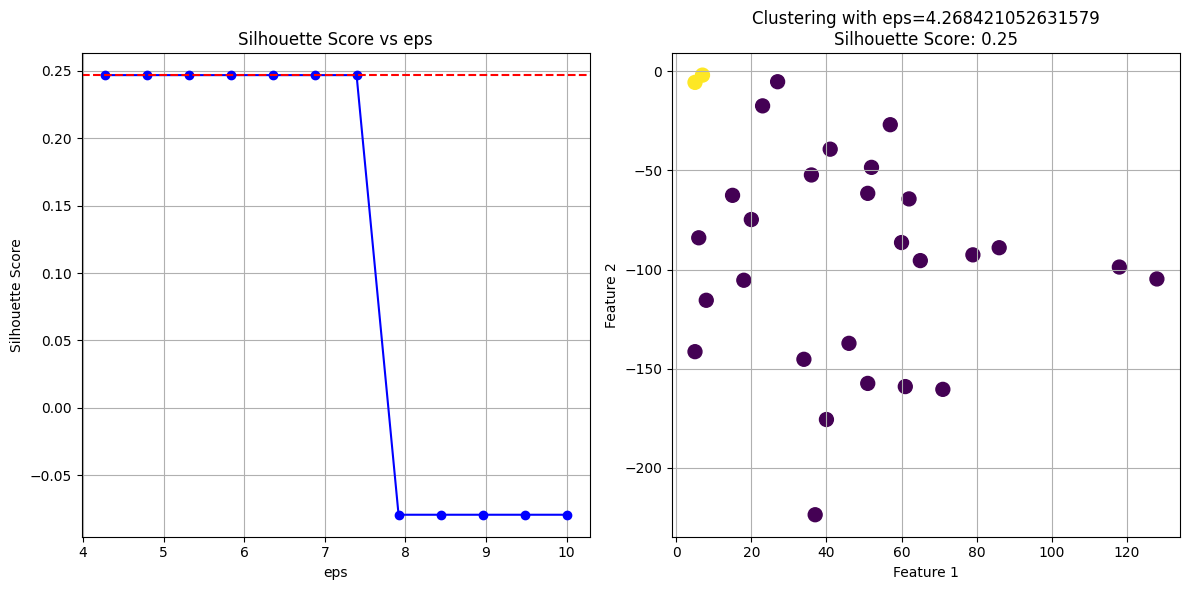

In [42]:
best_eps = best_param_in_range(
    class_model=DBSCAN,
    param={'min_samples': 2},  # Фиксируем min_samples
    name_param='eps',
    range_param=np.linspace(0.1, 10, 20),  # Диапазон значений eps
    X=X
)